# Grafiken erstellen mit PyTamaro

Dieses Notbook basiert auf der 
[Einführung in
PyTamaro](https://pytamaro.si.usi.ch/curricula/luce/welcome)
der Università de
la Svizzera italiana (usi).

## Tessiner Kantonswappen

Weil PyTamaro im Tessin entwickelt wird, zeichnen wir zu Ehren des
Kantons Tessin als erstes ein Tessiner Wappen.

![Tessin](../images/ticino-coat-of-arms.svg)

PyTamaro kann nur eine beschränkte Anzahl von geometrischen Figuren
zeichnen:

* Dreiecke
* Ellipsen
* Kreissektoren
* Rechtecke

Ausserdem kann jeder Figur nur eine Farbe zugewiesen werden.

Sie müssen daher als erstes das Tessiner Wappen in passende Teilgrafiken
zerlegen. Erstellen Sie im folgenden Feld eine Liste mit Formen in den
jeweiligen Farben, mit denen Sie das Tessiner Wappen zusammenbauen wollen.

### "Stückliste Wappen Kanton Tessin"

* 1 Rechteck rot
* 1 Rechteck blau
* 1 Kreissektor rot
* 1 Kreissektor blau

### Einzelteile Wappen Kanton Tessin

Wie Sie sicher festgestellt haben, brauchen Sie für das Wappen des
Kantons Tessin Rechtecke und Kreissektoren in den Farben rot und blau.

Hier finden Sie die Anleitung zum Zeichnen von
[Rechtecken](https://pytamaro.readthedocs.io/en/stable/German/primitives.html#pytamaro.de.primitives.rechteck)
und
[Kreissektoren](https://pytamaro.readthedocs.io/en/stable/German/primitives.html#pytamaro.de.primitives.kreis_sektor).
Mit dem Befehl 
[`zeige_grafik()`](https://pytamaro.readthedocs.io/en/stable/German/io.html#pytamaro.de.io.zeige_grafik)
kann eine Grafik angezigt werden.

>Beispiel: `zeige_grafik(name_der_grafik)`

Zeichnen Sie in der folgenden Code Zelle die erforderlichne Einzelteile.
Die Proportionen für das Wappen können Sie der folgenden Abbildung
entnehmen:

![Proportionen](../images/MetalSheetWithMeasures.png)

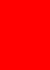

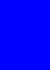

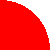

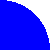

In [1]:
"""
Um die nötigen Befehle in PyTamaro verwenden zu können, müssen diese
zuerst importiert werden. Dies geschieht mit dem folgenden Befehl.
"""
from pytamaro.de import (rechteck, kreis_sektor,
                         rot, blau,
                         zeige_grafik)

rechteck_rot = rechteck(50, 70, rot)
rechteck_blau = rechteck(50, 70, blau)
kreissektor_rot = kreis_sektor(50, 90, rot)
kreissektor_blau = kreis_sektor(50, 90, blau)

zeige_grafik(rechteck_rot)
zeige_grafik(rechteck_blau)
zeige_grafik(kreissektor_rot)
zeige_grafik(kreissektor_blau)

### Zusammenbau des Wappens aus den Einzelteilen

Um das Wappen aus den Einzelteilen zusammenbauen zu können, brauchen wir
neben den Formen noch Befehle, mit denen wir die Teilgrafiken
manipulieren können. Die Rechtecke müssen wir nebeneinander anordnen,
die Kreissektoren zuerst noch drehen und dann nebeneinander anordnen und
zum Schluss müssen wir die so entstandenen Teilgrafiken noch
übereinander anordnen.

PyTamaro verfügt über die Befehle
[`neben()`](https://pytamaro.readthedocs.io/en/stable/German/operations.html#pytamaro.de.operations.neben),
[`drehe()`](https://pytamaro.readthedocs.io/en/stable/German/operations.html#pytamaro.de.operations.drehe)
sowie
[`ueber()`](https://pytamaro.readthedocs.io/en/stable/German/operations.html#pytamaro.de.operations.ueber).

In der folgenden Code Zelle werden zuerst die Befehle importiert,
anschliessend können Sie das Wappen zusammenbauen.

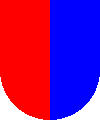

In [2]:
from pytamaro.de import (neben, drehe, ueber)

top = neben(rechteck_rot, rechteck_blau)

kreissektor_rot_gedreht = drehe(180, kreissektor_rot)
kreissektor_blau_gedreht = drehe(270, kreissektor_blau)

bottom = neben(kreissektor_rot_gedreht, kreissektor_blau_gedreht)

TI = ueber(top, bottom)

zeige_grafik(TI)

## Schweizerfahne

Die Dimensionen der Schweizerfahne richten sich nach dem Bundesgesetz
über den Schutz des Schweizerwappens und anderer öffentlicher Zeichen
(Wappenschutzgesetz,
[WSchG](https://www.fedlex.admin.ch/eli/oc/2015/613/de)). Der Anhang 2 des WSchG regelt sowohl die
Masse wie auch die Farbe der Schweizerfahne.

Es wäre wohl möglich, mit den bisherigen Werkzeugen eine Schweizerfahne
zu zeichnen. Allerdings brauchte man dann viele Einzelteile. Zum Glück
stellt PyTamaro neben den bereits erwähnten Werkzeugen noch eine
Funktion
[`ueberlagere()`](https://pytamaro.readthedocs.io/en/stable/German/operations.html#pytamaro.de.operations.ueberlagere)
zur Verfügung. Mit deren Hilfe ist es möglich, die Schweizerfahne mit
blos zwei verschiedenen Teilgrafiken zusammenzustellen.

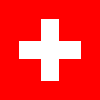

In [6]:
from pytamaro.de import (ueberlagere,
                         weiss)

hintergrund = rechteck(100, 100, rot)

balken = rechteck(100/32*20, 100/32*6, weiss)

balken_senkrecht = drehe(90, balken)

kreuz = ueberlagere(balken, balken_senkrecht)

schweizer_fahne = ueberlagere(kreuz, hintergrund)

zeige_grafik(schweizer_fahne)

Kann dieser Code so umformuliert werden, dass eine korrekt
proportionierte Schweizerfahne mit beliebiger Kantenlänge gezeichnet wird?

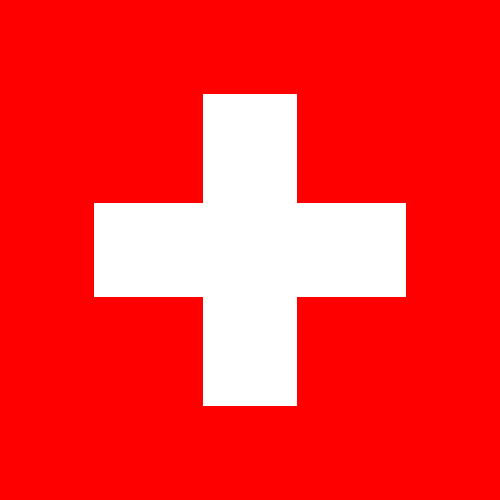

In [10]:
from pytamaro.de import (rechteck, Grafik,
                         drehe, ueberlagere, zeige_grafik,
                         rot, weiss)
def swiss_flag(width : float) -> Grafik:
    background = rechteck(width, width, rot)
    balken     = rechteck(width/32*20, width/32*6, weiss)
    balken_senkrecht = drehe(90, balken)
    kreuz = ueberlagere(balken, balken_senkrecht)
    flag = ueberlagere(kreuz, background)
    zeige_grafik(flag)
    return flag

schweizer_fahne = swiss_flag(500)

## Taijitu

Nach den Übungen mit hoheitlichen Symbolen zum Abschluss ein eher
philosophisches Symbol:

![Taijitu](../images/Yin_yang.svg)

Zeichnen Sie das Taijitu nach. Gehen Sie dabei gleich vor wie bisher.

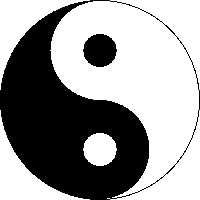

In [17]:
from pytamaro.de import (ellipse, kreis_sektor,
                         drehe, neben, ueberlagere, ueber,
                         weiss, schwarz,
                         zeige_grafik)

radius = 100
background = ellipse(radius * 2, radius * 2, schwarz)
black_circle = ellipse(radius-1, radius-1, schwarz)
white_circle = ellipse(radius-1, radius-1, weiss)
white_dot = ellipse(radius/3, radius/3, weiss)
black_dot = ellipse(radius/3, radius/3, schwarz)
black_dotted_circle = ueberlagere(white_dot, black_circle)
white_dotted_circle = ueberlagere(black_dot, white_circle)
dotted_circles = ueber(white_dotted_circle, black_dotted_circle)
black_half = drehe(90, kreis_sektor(radius-1, 180, schwarz))
white_half = drehe(-90, kreis_sektor(radius-1, 180, weiss))
two_halfs = neben(black_half, white_half)
two_halfs_framed = ueberlagere(two_halfs, background)
taijiu = ueberlagere(dotted_circles, two_halfs_framed)
zeige_grafik(taijiu)